# Embracing the Visualization Grammar

- Monday March 9, 2020
- Firas Moosvi, PhD

## Lecture plan (45 minutes)

- Part 1: Warm-up and Review (15 mins)
    - Case 1
    - Case 2


- Part 2: Introduction to Altair (20 mins)
    - Visualization Grammar
    - Altair syntax
    
    

- Part 3: Looking ahead (5 mins)
    - Interactions in Altair

## Learning Outcomes

- Point 1

- Point 2

- Point 3

- Point 4

## Part 1: Motivating Visualizations

## Case 1: “The rise of smartphones in the population have dramatically increased prevalence of wrist/thumb injuries.”

<center>
<img src=imgs/case1.png width=70% align="center"/>
</center>

## Question: Evaluate the strength of the claim based on the visualization.

In [32]:
## Question: Evaluate the strength of the claim based on the visualization:

src2 = 'https://app.sli.do/event/suav6t7y/embed/polls/6de1526d-1500-4c0b-a4fe-d331d6f9256d'

IPython.display.IFrame(src2, 700, 550)

## Case 2

![](covid19.png)

## Part 2: Introduction to Altair


## Visualization Grammar

Slides describing the Visualization Grammar

## Time to play with Altair!

In [3]:
# Let's first install the altair library

import sys
!{sys.executable} -m pip install altair

In [26]:
# And import the libraries 

import pandas as pd
import numpy as np

# Then import it
import altair as alt

## 1. Data and the Chart object

Data in Altair is built around the [Pandas Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

We'll create a simple `DataFrame` to visualize, with a categorical data in the `Letters` column and numerical data in the `Numbers` column:

In [58]:
data = pd.DataFrame({'Letters': list('CCCDDDEEE'),
                     'Numbers': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
data

,Letters,Numbers
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2
5,D,6
6,E,8
7,E,4
8,E,7


Contrary to other plotting libraries, in Altair, every dataset must be provided as either:

- a Dataframe, OR 
- a URL to a `json` or `csv` file
- GeoJSON objects (for maps)

The URL passed in, is turned into a dataframe behind the scenes. 

See [Defining Data](https://altair-viz.github.io/user_guide/data.html) in the Altair documentation for more details.

The fundamental object in Altair is the ``Chart``. It takes the dataframe as a single argument:

In [59]:
chart = alt.Chart(data)

Fundamentally, a `Chart` is an object which contains all the information needed to create and render a plot using the Vega-Lite JavaScript library.

At this point the specification contains only the data and the default configuration, but no visualization specification.

## 2. Chart Marks

Next we can decide what sort of *mark* we would like to use to represent our data.

Here are some of the more commonly used `mark_*()` methods supported in Altair and Vega-Lite; for more detail see [Marks](https://altair-viz.github.io/user_guide/marks.html) in the Altair documentation:

|Mark|
|------|
|`mark_area()`|
|`mark_bar()`|
|`mark_circle()`, `mark_point`, `mark_square`|
|`mark_rect()`|
|`mark_line()`|
|`mark_rule()`|
|`mark_text()`|
|`mark_image()`|

For example, we can choose the `point` mark to represent each data as a point on the plot:

In [111]:
chart = alt.Chart(data).mark_circle()
chart

alt.Chart(...)

The result is a visualization with one point per row in the data, though it is not a particularly interesting: all the points are stacked right on top of each other!

## 3. Data encodings

The next step is to add *visual encodings* (or *encodings* for short) to the chart. A visual encoding specifies how a given data column should be mapped onto the visual properties of the visualization.
Some of the more frequenty used visual encodings are listed here:

|Encoding| What does it encode?
|--------|--------------------|
|`X`| x-axis value | 
|`Y`| y-axis value |
|`Color`| color of the mark |
|`Opacity`| transparency/opacity of the mark |
|`Shape`| shape of the mark |
|`Size`| size of the mark |
|`Row`| row within a grid of facet plots |
|`Column`| column within a grid of facet plots |

For a complete list of these encodings, see the [Encodings](https://altair-viz.github.io/user_guide/encoding.html) section of the documentation.

### Visual encodings can be created with the `encode()` method of the `Chart` object. For example, we can start by mapping the `y` axis of the chart to column `Letters`:

In [101]:
chart = alt.Chart(data).mark_circle().encode(alt.Y('Letters'))
chart

alt.Chart(...)

Altair is able to automatically determine the type of the variable using built-in heuristics. 

That being said, it is good practice to specify the `encoding` explicitly.

There are four possible data types:

| Data Type | Description | Shortcode| 
| ----------| ----------- | ---------|
| Quantitative | Numerical quantity (real-valued) | Q |
| Nominal | Names / Unordered categoricals | N |
| ordinal | Ordered categorials | O | 
| temporal | Date/time | T | 


Altair provides a useful shorthand to specify them: 

- Quantitative `:Q`
- Nominal `:N`
- Ordinal `:O`
- Temporal `:T`.

In [93]:
alt.Chart(data).mark_circle().encode(y='Letters:N')

alt.Chart(...)

## You Try:

The visualization can be made more interesting by adding another channel to the encoding: let's encode the `Numbers` column as the `x` position:

In [113]:
alt.Chart(data).mark_circle().encode(
    alt.Y('Letters:N'),
    ## YOUR SOLUTION HERE
    alt.X('Numbers:Q')
)

alt.Chart(...)

With two visual channels encoded, we can see the raw data points in the `DataFrame`. A different mark type can be chosen using a different `mark_*()` method, such as `mark_bar()`:

In [114]:
## YOUR SOLUTION HERE
alt.Chart(data).mark_bar().encode(
    alt.Y('Letters:N'),
    alt.X('Numbers:Q')
)

alt.Chart(...)

## 4.Transformation: Aggregation

Altair and Vega-Lite also support a variety of built-in data transformations, such as aggregation. 

The easiest way to specify such aggregations is through a string-function syntax in the argument to the column name. 

For example, here we will plot not all the values, but a single point representing the mean of the x-values for a given y-value:

In [65]:
alt.Chart(data).mark_bar().encode(
    alt.Y('Letters:N'),
    alt.X('mean(Numbers):Q')
)

alt.Chart(...)

Conceptually, this is equivalent to the following groupby operation:

In [116]:
df2 = data.groupby('Letters').mean().reset_index()
df2

,Letters,Numbers
0,C,4.333333
1,D,3.000000
2,E,6.333333


Just to prove to ourselves Altair is doing what we think it is, let's plot this new dataframe:

In [117]:
alt.Chart(df2).mark_bar().encode(
    alt.Y('Letters:N'),
    alt.X('Numbers:Q')
)

alt.Chart(...)

## Customizing your visualization

To speed the process of data exploration, Altair (via Vega-Lite) makes some choices about default properties of the visualization.
Altair also provides an API to customize the look of the visualization. For example, we can use the `X` object we saw above to override the default x-axis title:

In [68]:
alt.Chart(data).mark_bar().encode(
    alt.Y('Letters:N'),
    alt.X('mean(Numbers):Q', axis=alt.Axis(title='Mean of Numbers quantity'))
)

alt.Chart(...)

The properties of marks can be configured by passing keyword arguments to the `mark_*()` methods; for example, any named HTML color is supported:

In [69]:
alt.Chart(data).mark_bar(color='firebrick').encode(
    alt.Y('Letters:N'),
    alt.X('mean(Numbers):Q', axis=alt.Axis(title='Mean of quantity b'))
)

alt.Chart(...)

Similarly, we can set properties of the chart such as width and height using the ``properties()`` method:

In [70]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y('Letters:N'),
    alt.X('mean(Numbers):Q', axis=alt.Axis(title='Mean of Numbers'))
).properties(
    width=400,
    height=300
)

chart

alt.Chart(...)

Let's now add a title to the previous plot, but instead of copying the code and adding to it, let's just add to the chart object:

In [71]:
chart = chart.properties(title='This is the best title')

chart

alt.Chart(...)

The font-size looks quite small, let's increase it:

In [92]:
chart.configure_axis(labelFontSize = 20,
                     titleFontSize = 20
).configure_title(
    fontSize=20,
    font='Arial',
    color='black'
)

alt.Chart(...)

You may not yet be impressed, as so far everything you can do in Altair, you can likely just as easily in any other plotting library... But watch this:

In [73]:
chart & chart

alt.VConcatChart(...)

## Let's compare Altair to something you know...

If you're familiar with `matplotlib`, this should illustrate to you **how** Altair is different (not better or worse, just *differently sane*).



In [22]:
# Let's start by loading the libraries needed; Generate matplotlib plots inline
%pylab inline

# and then import the `iris` dataset and load

iris = pd.read_json('https://github.com/altair-viz/vega_datasets/raw/master/vega_datasets/_data/iris.json')
iris.head()


Populating the interactive namespace from numpy and matplotlib


,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


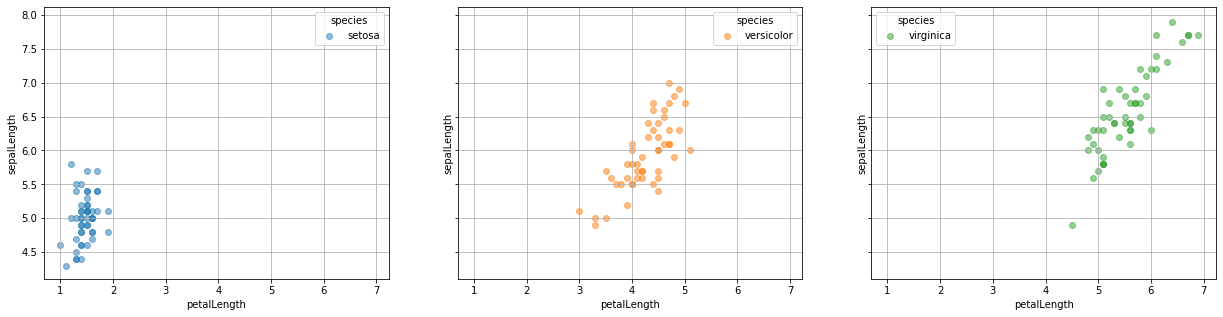

In [23]:
# In matplotlib:

colour_map = dict(zip(iris.species.unique(), ['C0','C1','C2']))
n_panels = len(colour_map)

fig, ax = plt.subplots(1, n_panels, figsize=(n_panels * 7, 5),
                       sharex = True, sharey = True)

for i, (species,group) in enumerate(iris.groupby('species')):
    ax[i].scatter(group['petalLength'],
                  group['sepalLength'],
                  alpha = 0.5,
                  label = species,
                  color = colour_map[species])
    ax[i].legend(title='species')
    ax[i].grid()
    ax[i].set_xlabel('petalLength')
    ax[i].set_ylabel('sepalLength')


In [19]:
# In Altair:

alt.Chart(iris).mark_circle().encode(
    alt.X('petalLength:Q'),
    alt.Y('sepalLength:Q'),
    alt.Color('species:N'),
    alt.Column('species:N')
).properties(height=200, width=275)

alt.Chart(...)

Full credit of the comparison with matplotlib goes to Eitan Lees [from a recent talk](https://speakerdeck.com/eitanlees/altair-tutorial)!

And the kicker... the most compelling reason for "why Altair": interactivity!

<center>
<img src="https://raw.githubusercontent.com/altair-viz/altair/master/images/cars_scatter_bar.gif" width=60% align="center"/>
</center>
But let's save that for the next lecture. Here's a quick preview.

## Part 3: Looking ahead

The [Altair gallery](https://altair-viz.github.io/gallery/index.html) has a comprehensive list of many, many plots! Let's have a quick look at the gallery and play with some examples:

- More plot types:
    - Interactive plots
    - Faceted plots
    - Choropleths (maps)
- Limitations of Altair
- Comparing Altair to matplotlib and seaborn

## Summary:

1. Motivation for the importance of visualizations

2. Visualization Grammar
    - Data
    - Marks
    - Encoding
    - Transformation
    - Scale
    - Guide

3. Introduction to Altair
    - Declarative syntax
    - Figure layouts using shorthand: & and |

4. Looking ahead
    - Interactive plots
    - Faceted plots
    - Choropleths (maps)

![](imgs/02-altair-stack.png)

[Credit: Eitan Lees](https://eitanlees.github.io/altair-stack/)

## Slide settings 

In [27]:
import IPython

In [100]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "serif",
            "transition": "fade",
            "start_slideshow_at": "selected",
            "autolaunch": True,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
            "center": False,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True,
            

        }
    )

## Set Altair default size

def theme_fm(*args, **kwargs):
    return {'height': 300,
            'config': {'style': {'circle': {'size': 400},
                                'point': {'size': 400},
                                'square': {'size': 400},
                                },
                       'legend': {'symbolSize': 20, 'titleFontSize': 20, 'labelFontSize': 20}, 
                       'axis': {'titleFontSize': 20, 'labelFontSize': 20}},
            }

alt.themes.register('theme_fm', theme_fm)
alt.themes.enable('theme_fm')

ThemeRegistry.enable('theme_fm')

In [75]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 120%;
}
</style>